# Visualize Cross-Prediction Results

In [62]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get Results

In [7]:
from os.path import join
from common.paths import CROSS_PRED_RESULTS

fn = 'ridge_pts_age_cross_prediction.csv'
results_path = join(CROSS_PRED_RESULTS, fn)
df = pd.read_csv(results_path, index_col=0)
display(df)

,Model,Target,Num Permutations,Train Group,Test Group,Score,P-value,BFR,FDR
0,ridge,WISC_FSIQ,500,Bin 1,Bin 1,0.2453,0.0220,False,True
1,ridge,WISC_FSIQ,500,Bin 1,Bin 2,0.3361,0.0020,False,True
2,ridge,WISC_FSIQ,500,Bin 1,Bin 3,0.1995,0.0080,False,True
3,ridge,WISC_FSIQ,500,Bin 2,Bin 2,0.3774,0.0020,False,True
4,ridge,WISC_FSIQ,500,Bin 2,Bin 3,0.2402,0.0040,False,True
5,ridge,WISC_FSIQ,500,Bin 2,Bin 1,0.3567,0.0020,False,True
6,ridge,WISC_FSIQ,500,Bin 3,Bin 3,0.0589,0.3214,False,False
7,ridge,WISC_FSIQ,500,Bin 3,Bin 1,0.2149,0.0060,False,True
8,ridge,WISC_FSIQ,500,Bin 3,Bin 2,0.3137,0.0020,False,True
9,ridge,WISC_VSI,500,Bin 1,Bin 1,0.2309,0.0240,False,True


In [9]:
from common.wisc import WISC_LEVEL

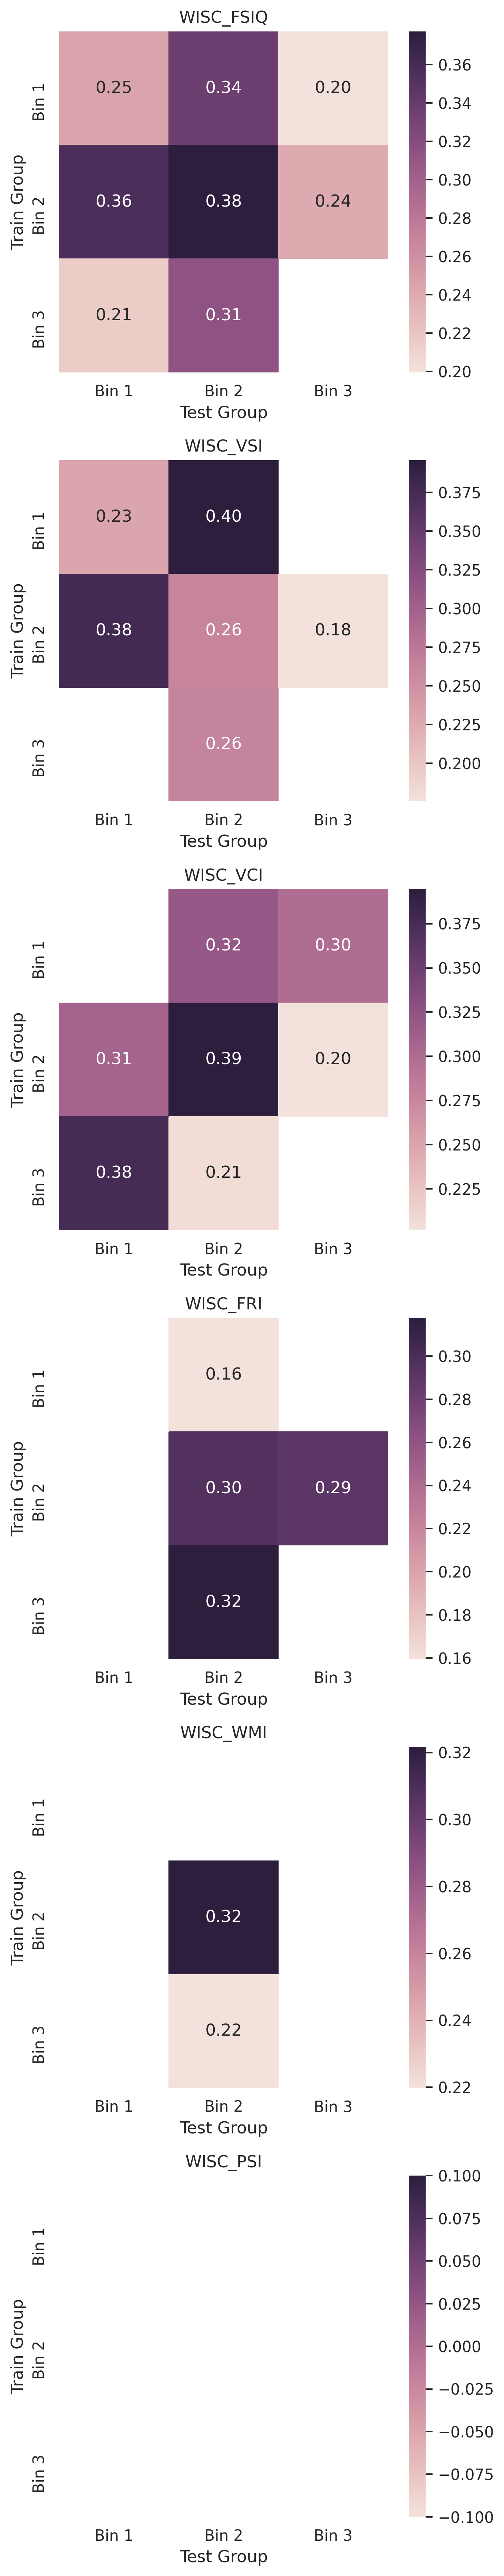

In [67]:
fig, axs = plt.subplots(nrows=6, figsize=(5, 25))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

for idx, measure in enumerate(WISC_LEVEL[5]):
    df_measure = df[df['Target'] == measure]
#     display(df_measure)

    scores = df_measure.pivot('Train Group', 'Test Group', 'Score')
#     display(scores)
    is_sig = df_measure.pivot('Train Group', 'Test Group', 'FDR')
    
    ax = sns.heatmap(scores, annot=True, fmt=".2f", mask=~is_sig, ax=axs[idx], cmap=cmap)
    ax.set_title(measure)
    
fig.tight_layout()
plt.show()